In [1]:
#DATASET 
!wget http://cb.lk/covid_19

--2021-05-10 07:51:00--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-05-10 07:51:00--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-05-10 07:51:01--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-05-10 07:51:01--  https://www.dropbox.com/s/ra

In [ ]:
!unzip covid_19

In [3]:
#CODE
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

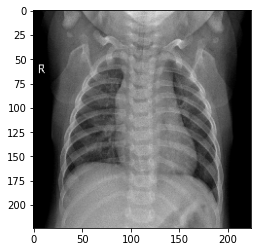

In [4]:
#X-Ray image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image
def show_the_image(xray):
  xray = load_img(xray, target_size=(224, 224))
  plt.imshow(xray)
show_the_image('/content/CovidDataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

CNN Based Model
Its a sequential model, which means it has layers. Each layer has certain filters. It is like layer1 has n no of filters, layer2 has m no of filters and so on.

Here we will be creating 3 or 4 cnn layers followed by classification layers.


**CONCEPT OF RECEPTIVE FIELD**

First of all we added a convolutional layer with 32 filters, we're keeping no of filters small in the beginning. The Initial/lower layers detect features in very small part of image, and if we just see a very small part of an image then we will detect/recognise very few patterns as we are looking at small part.
But as you go deep into the network, the receptive field of cnn layer increases .ie the features it extract are based upon a bigger part of the original image. 

In [6]:
# CNN Based Model
# Its a sequential model, which means it has layers
# Each layer has certain filters. like layer1 has n no of filters, layer2 has m no of filters and so on.

# Here we will be creating 3 or 4 cnn layers followed by classification layers

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))    # add another conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))           # add maxpooling layer
model.add(Dropout(0.25))
# we havent used vgg bcs it will overfit. watch tut at 57.00

# SECOND conv layer
model.add(Conv2D(64, (3, 3), activation='relu'))    # add another conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))           # add maxpooling layer
model.add(Dropout(0.25))

# THIRD conv layer
model.add(Conv2D(128, (3, 3), activation='relu'))    # add another conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))           # add maxpooling layer
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [7]:
# Train from scratch
# make the traing_data objects
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True, 
)

test_dataset = image.ImageDataGenerator(rescale=1./255)


In [8]:

train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs = 8,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/8
6/6 [==============================] - 44s 7s/step - loss: 1.4307 - accuracy: 0.5391 - val_loss: 0.6812 - val_accuracy: 0.5000
Epoch 2/8
6/6 [==============================] - 42s 7s/step - loss: 0.6425 - accuracy: 0.6832 - val_loss: 0.6151 - val_accuracy: 0.8000
Epoch 3/8
6/6 [==============================] - 43s 7s/step - loss: 0.5243 - accuracy: 0.6984 - val_loss: 0.3907 - val_accuracy: 0.9333
Epoch 4/8
6/6 [==============================] - 43s 7s/step - loss: 0.3543 - accuracy: 0.8449 - val_loss: 0.3113 - val_accuracy: 0.8667
Epoch 5/8
6/6 [==============================] - 43s 7s/step - loss: 0.2847 - accuracy: 0.8849 - val_loss: 0.3046 - val_accuracy: 0.8833
Epoch 6/8
5/6 [========================>.....] - ETA: 6s - loss: 0.4629 - accuracy: 0.8289 

In [ ]:
score = model.evaluate(validation_generator, verbose=0)
print('loss: ', score[0])
print('accuracy: ', score[1])

In [ ]:
# # Configuration related preprocessing step before mounting the drive
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse
# from google.colab import auth
# auth.authenticate_user()
# from oauth2client.client import GoogleCredentials
# creds = GoogleCredentials.get_application_default()
# import getpass
# !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# vcode = getpass.getpass()
# !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Save the model online
model.save('/content/drive/MyDrive/Colab Notebooks/covid19detector.h5')

In [ ]:
# =================== TESTING PART ======================== #

model1 = load_model('/content/drive/MyDrive/Colab Notebooks/covid19detector.h5')

In [ ]:
import os
train_generator.class_indices

In [ ]:
# Import few more necessary libraries.
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
final_result = ""
# Function to load and prepare the image in right shape
def load_image(filename):
  # Load the image
  img = image.load_img(filename, target_size=(224, 224))
  # Convert the image to array
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  # model = load_model('/content/drive/MyDrive/Colab Notebooks/covid19detector.h5') /loaded above/
  p = model.predict(img)
  # Predict the output
  # Map category with the numerical class
  if p[0,0] == 0.0:
    final_result = "Covid Positive"
  elif p[0,0] == 1.0:
    final_result = "Covid Negative"
  print(p[0,0], ":", final_result)

show_the_image('/content/CovidDataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg')
load_image('/content/CovidDataset/Val/Normal/NORMAL2-IM-0857-0001.jpeg')